# Week 3 Assignment
### By: Domendra (523110015)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew

In [3]:
df = pd.read_csv("teachingratings - teachingratings.csv")

In [17]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


## Task 1: Generate a histogram for the "beauty" variable and provide a brief analysis of the data distribution.

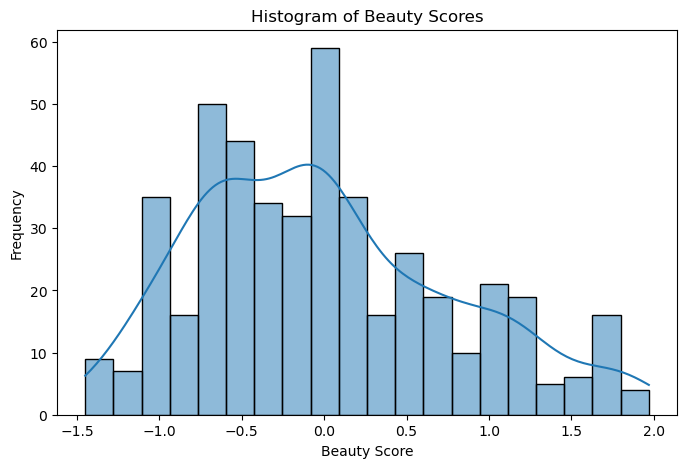

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['beauty'], bins=20, kde=True)
plt.xlabel('Beauty Score')
plt.ylabel('Frequency')
plt.title('Histogram of Beauty Scores')
plt.show()

### Task 2: Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.

In [6]:
gender_stats = df.groupby('gender')['beauty'].agg(['mean', 'std', 'var'])
display(gender_stats)

,mean,std,var
gender,,,
female,0.116109,0.81781,0.668813
male,-0.084482,0.75713,0.573246


### Task 3: What is the Median evaluation score for tenured Professors?

In [8]:
median_eval_tenured = df[df['tenure'] == 'yes']['eval'].median()
print("Median evaluation score for tenured professors:", median_eval_tenured)

Median evaluation score for tenured professors: 4.0


### Task 4: Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

In [9]:
tenure_stats = df.groupby('tenure')['age'].agg(['mean', 'std'])
display(tenure_stats)

,mean,std
tenure,,
no,50.186275,6.946372
yes,47.850416,10.420056


## Task 5: Analyze the generated plots and answer the following questions:
1. What trends do you observe between "age" and "eval" across different "tenure" groups?
2. Are there any noticeable differences in evaluation scores based on "gender"?
3. How does tenure influence the relationship between "age" and "eval"?

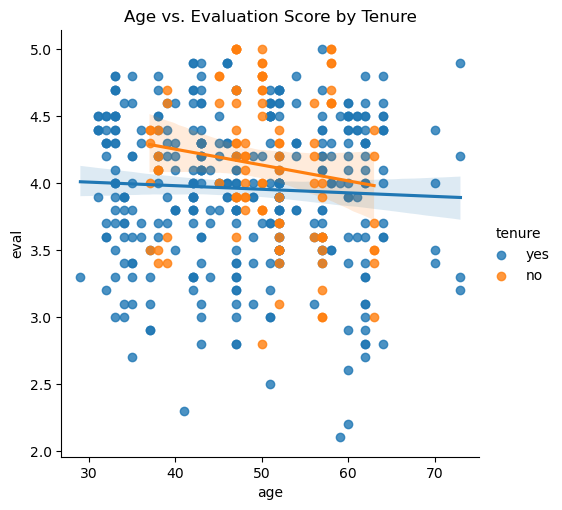

In [10]:
sns.lmplot(x='age', y='eval', hue='tenure', data=df)
plt.title("Age vs. Evaluation Score by Tenure")
plt.show()

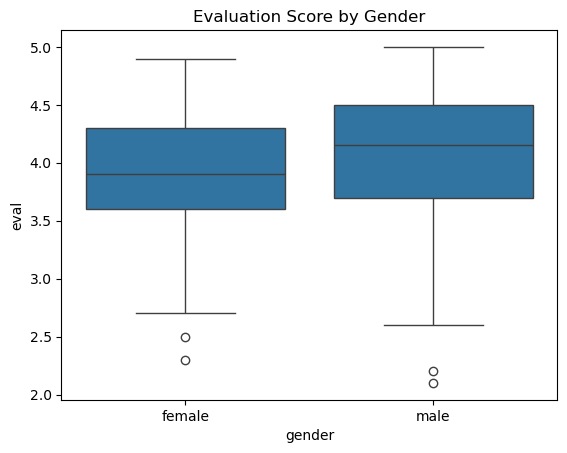

In [11]:
sns.boxplot(x='gender', y='eval', data=df)
plt.title("Evaluation Score by Gender")
plt.show()

## Task 6: Using the teachers' rating dataset, what is the probability of receiving an evaluation score of greater than 4.5.

In [12]:
mean_eval = df['eval'].mean()
std_eval = df['eval'].std()
z_score = (4.5 - mean_eval) / std_eval
probability = 1 - norm.cdf(z_score)
print("Probability of receiving an evaluation score > 4.5:", probability)

Probability of receiving an evaluation score > 4.5: 0.18293588277242767


## Task 7: Using the teachers' rating dataset, what is the probability of receiving an evaluation score between 2 and 3?

In [13]:
z_score_low = (2 - mean_eval) / std_eval
z_score_high = (3 - mean_eval) / std_eval
prob_between = norm.cdf(z_score_high) - norm.cdf(z_score_low)
print("Probability of receiving an evaluation score between 2 and 3:", prob_between)

Probability of receiving an evaluation score between 2 and 3: 0.03584123271036406


## Task 8: Using gender-differentiated scatter plots, plot the relationship between age and teaching evaluation scores.

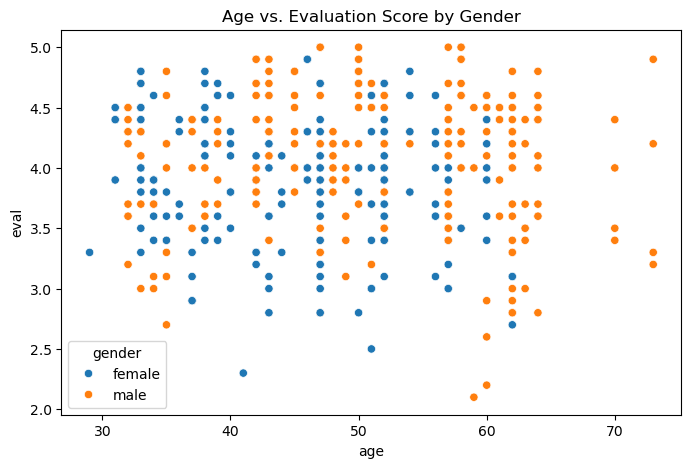

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='eval', hue='gender', data=df)
plt.title("Age vs. Evaluation Score by Gender")
plt.show()

## Task 9: Create a box plot to Compare age along with tenure on the basis of gender.

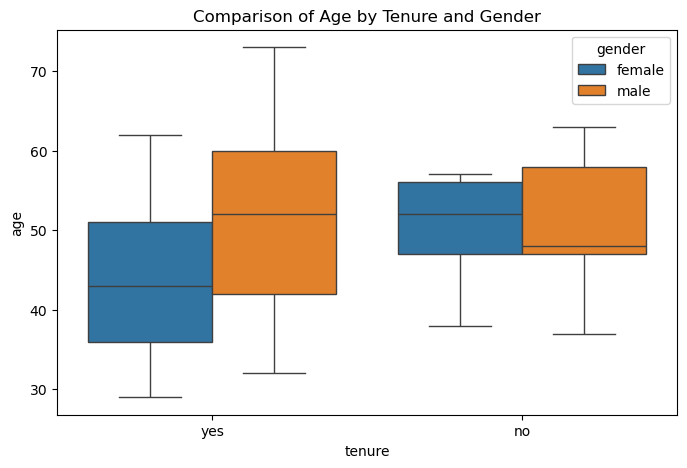

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='tenure', y='age', hue='gender', data=df)
plt.title("Comparison of Age by Tenure and Gender")
plt.show()

## Task 10: Calculate the skewness of the evaluation scores using the skew() function and interpret whether the distribution is symmetrical, positively skewed, or negatively skewed. Create a histogram using matplotlib or seaborn to visually confirm the skewness.

Skewness of Evaluation Scores: -0.4658752746343306


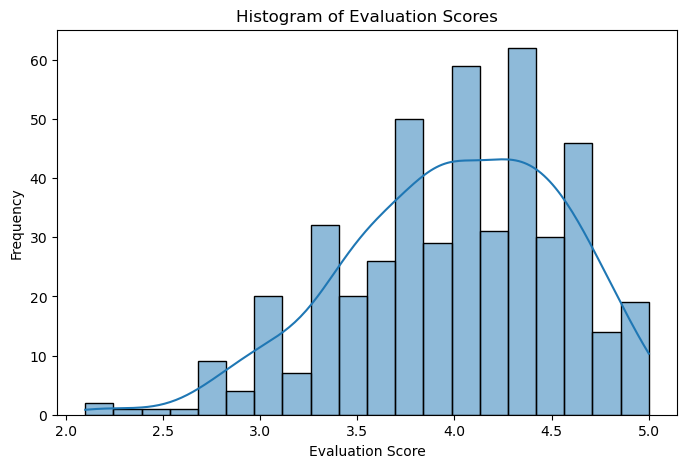

In [18]:
eval_skewness = skew(df['eval'])
print("Skewness of Evaluation Scores:", eval_skewness)

plt.figure(figsize=(8, 5))
sns.histplot(df['eval'], bins=20, kde=True)
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')
plt.title('Histogram of Evaluation Scores')
plt.show()